In [2]:
#考虑一个用于回归任务的简单神经网络，其结构如下：

#输入层： 1 个神经元
#隐藏层： 2 个神经元，使用线性激活函数（即不使用激活函数）
#输出层： 1 个神经元，线性输出

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#sigmoid函数实现
def sigmoid(a):
  return 1/(1 + np.exp(-a))

In [5]:
#前向传播, 求y_pred的值
def forward(W1, W2, b1, b2, X):
  Z = np.dot(X, W1.T) + b1.T #shape (2,2)

  y_pred = np.dot(Z, W2.T) + b2
  return Z, y_pred

In [6]:
#求损失函数loss值
def compute_loss(y_pred, y_true):
  loss = (y_pred - y_true)**2 /2
  return loss

In [10]:
#反向传导,求梯度计算
def backward(y_pred, y_true, Z, W2, X):
  dy_diff = y_pred - y_true
  b2_grad = np.mean(dy_diff, axis=0, keepdims=True)
  W2_grad = np.dot(dy_diff.T, Z)

  dz = np.dot(dy_diff, W2)
  b1_grad = np.mean(dz, axis=0, keepdims=True).T
  W1_grad = np.dot(dz.T, X)
  return W1_grad, W2_grad, b1_grad, b2_grad

In [8]:
#更新参数，weight,bias
def update_params(W1, W2, b1, b2, W1_grad, W2_grad, b1_grad, b2_grad, lr):
    W1 -= lr * W1_grad
    W2 -= lr * W2_grad
    b1 -= lr * b1_grad
    b2 -= lr * b2_grad

    return W1, W2, b1, b2

Epoch: 1 loss: 41.0 W1_grad: [46. 92.] W2_grad: [ 55. 110.] b1_grad: [ 9. 18.] b2_grad: [9.]
Epoch: 2 loss: 2.6667 W1_grad: [ -5.19 -10.39] W2_grad: [ -7.98 -15.96] b1_grad: [-0.96 -1.92] b2_grad: [-2.13]
Epoch: 3 loss: 0.7941 W1_grad: [-3.13 -6.25] W2_grad: [-4.36 -8.73] b1_grad: [-0.55 -1.1 ] b2_grad: [-1.04]
Epoch: 4 loss: 0.2533 W1_grad: [-1.42 -2.83] W2_grad: [-1.86 -3.71] b1_grad: [-0.21 -0.43] b2_grad: [-0.37]
Epoch: 5 loss: 0.1577 W1_grad: [-0.55 -1.1 ] W2_grad: [-0.65 -1.31] b1_grad: [-0.04 -0.09] b2_grad: [-0.07]
Epoch: 6 loss: 0.1454 W1_grad: [-0.22 -0.43] W2_grad: [-0.2 -0.4] b1_grad: [0.02 0.04] b2_grad: [0.04]
Epoch: 7 loss: 0.1438 W1_grad: [-0.11 -0.21] W2_grad: [-0.05 -0.11] b1_grad: [0.04 0.09] b2_grad: [0.07]
Epoch: 8 loss: 0.1434 W1_grad: [-0.07 -0.14] W2_grad: [-0.01 -0.01] b1_grad: [0.05 0.1 ] b2_grad: [0.08]
Epoch: 9 loss: 0.1431 W1_grad: [-0.06 -0.12] W2_grad: [0.01 0.02] b1_grad: [0.05 0.1 ] b2_grad: [0.09]
Epoch: 10 loss: 0.1428 W1_grad: [-0.06 -0.11] W2_grad: 

/tmp/ipykernel_5555/3651323419.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


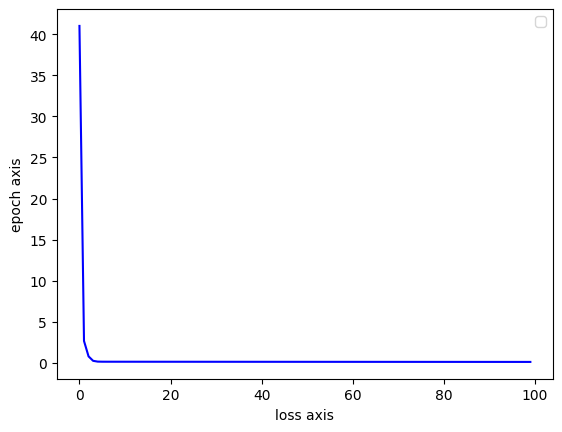

In [11]:
X = np.array([[2.0],
        [3.0]]) #ndarray (2,1)

W1 = np.array([[1.0],
        [2.0]]) #ndarray (2,1) （输入层到隐藏层）
b1 = np.array([[0.5], [1.0]]) #ndarray (2,1) （隐藏层偏置）
W2 = np.array([[1.0, 2.0]]) #ndarray (1,2) （隐藏层到输出层）
b2 = np.array([[0.5]]) #ndarray (1,1) （输出层偏置）

lr = 0.01

y_true = np.array([[5.0], [8.0]]) #ndarray (2,1)
losses = []
epochs = 100

for epoch in range(epochs):
  Z, y_pred = forward(W1, W2, b1, b2, X)
  loss = (y_pred - y_true)**2 /2

  losses.append(loss.mean())
  W1_grad, W2_grad, b1_grad, b2_grad = backward(y_pred, y_true, Z, W2, X)
  W1, W2, b1, b2 = update_params(W1, W2, b1, b2, W1_grad, W2_grad, b1_grad, b2_grad, lr)

  print("Epoch:", epoch + 1,
      "loss:", np.round(loss.mean(), 4),
      "W1_grad:", np.round(W1_grad.flatten(), 2),
      "W2_grad:", np.round(W2_grad.flatten(), 2),
      "b1_grad:", np.round(b1_grad.flatten(), 2),
      "b2_grad:", np.round(b2_grad.flatten(), 2)
    )

plt.plot(range(epochs), losses, "blue")
plt.xlabel("loss axis")
plt.ylabel("epoch axis")
plt.legend()
plt.show()